In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
import cartopy.crs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from PIL import Image
import pandas
from PIL import Image, ImageDraw

In [2]:
# Use Pandas to Read Ten Minute Windspeed Data File
Ten_Min_Windspeed_File = pandas.read_csv("Ten_Min_Windspeed_Data.csv")
Ten_Min_Windspeed_File.head()

,Typhoon Code,Typhoon Name,Highest Signal Issued,Cheung Chau,Hong Kong International Airport,Sai Kung,Kai Tak,Tsing Yi Shell Oil Depot,Lau Fau Shan,Ta Kwu Ling,Sha Tin,King's Park,Waglan Island
0,(0706_1,Pabuk_1,3,79,52,48,41.0,48,42.0,28,27,36,92.0
1,(0706_2,Pabuk_2,8,101,59,54,NaN,60,42.0,23,35,31,88.0
2,(0801,Neoguri,3,84,68,47,50.0,47,44.0,31,33,31,85.0
3,(0806,Fengshen,8,76,65,51,68.0,49,68.0,29,40,41,110.0
4,(0809,Kammuri,8,89,62,66,55.0,42,54.0,37,37,45,104.0


In [3]:
# Use Pandas to Read One Hour Windspeed Data Output File
One_Hour_Windspeed_File = pandas.read_csv("One_Hour_Windspeed_Data_Output.csv")
One_Hour_Windspeed_File.head()

,Typhoon Code,Typhoon Name,Bluff Head (Stanley),Central Pier,Cheung Chau,Cheung Chau Beach,Green Island,Hong Kong International Airport,Kai Tak,King's Park,...,Tai Po Kau,Tap Mun East,Tate's Cairn,Tseung Kwan O,Tsing Yi Shell Oil Depot,Tuen Mun Government Offices,Waglan Island,Wetland Park,Wong Chuk Hang,
0,(2002,Nuri,NaN,33.0,54,50.0,45.0,34,30.0,28,...,32.0,52.0,58.0,15.0,26.0,24,54.0,15.0,23.0,
1,(1914,Kajiki,31.0,34.0,43,51.0,51.0,34,25.0,22,...,34.0,45.0,54.0,14.0,20.0,12,56.0,13.0,22.0,
2,(1912,Podul,30.0,34.0,40,47.0,45.0,34,25.0,22,...,34.0,45.0,45.0,12.0,19.0,14,51.0,16.0,22.0,
3,(1911,Bailu,22.0,25.0,31,40.0,34.0,36,20.0,16,...,14.0,27.0,NaN,9.0,20.0,16,47.0,13.0,16.0,
4,(1907,Wipha,51.0,43.0,72,68.0,59.0,47,34.0,31,...,43.0,63.0,76.0,20.0,31.0,23,70.0,20.0,31.0,


In [4]:
# Convert Ten Min Windspeed Data Windspeed Stations Into List
Ten_Min_Windspeed_Stations = list(Ten_Min_Windspeed_File.columns)
del Ten_Min_Windspeed_Stations[0]
del Ten_Min_Windspeed_Stations[0]
del Ten_Min_Windspeed_Stations[0]
print (Ten_Min_Windspeed_Stations)
print ("")
#
# Convert Ten Min Windspeed Data Typhoon Codes and Names Into List
Ten_Min_Typhoon_Code = list(Ten_Min_Windspeed_File["Typhoon Code"])
Ten_Min_Typhoon_Name = list(Ten_Min_Windspeed_File["Typhoon Name"])
print (Ten_Min_Typhoon_Code)
print ("")
print (Ten_Min_Typhoon_Name)
print ("")
#
# Convert Ten Min Windspeed Data Into 2D Array
Ten_Min_Windspeed_Data = numpy.zeros((len(Ten_Min_Windspeed_Stations),len(Ten_Min_Windspeed_File)))
for i in range(len(Ten_Min_Windspeed_Stations)):
    Ten_Min_Windspeed_Data[i] = Ten_Min_Windspeed_File[Ten_Min_Windspeed_File.columns[i+3]]
print (Ten_Min_Windspeed_Data)

['Cheung Chau', 'Hong Kong International Airport', 'Sai Kung', 'Kai Tak', 'Tsing Yi Shell Oil Depot', 'Lau Fau Shan', 'Ta Kwu Ling', 'Sha Tin', "King's Park", 'Waglan Island']

['(0706_1', '(0706_2', '(0801', '(0806', '(0809', '(0812', '(0814', '(0904', '(0905', '(0906', '(0907', '(0913', '(0915', '(1003', '(1011', '(1013', '(1104', '(1108', '(1117', '(1119', '(1205', '(1206', '(1208', '(1213', '(1305', '(1306', '(1309', '(1311', '(1319', '(1409', '(1415', '(1510', '(1522', '(1601W', '(1604', '(1608', '(1621', '(1622', '(1702', '(1707', '(1713', '(1714', '(1716', '(1720', '(1804', '(1809_1', '(1816', '(1823', '(1822', '(1826', '(1907', '(1914', '(2002']

['Pabuk_1', 'Pabuk_2', 'Neoguri', 'Fengshen', 'Kammuri', 'Nuri', 'Hagupit', 'Nangka', 'Soudelor', 'Molave', 'Goni', 'Mujigae', 'Koppu', 'Chanthu', 'Fanapi', 'Megi', 'Haima', 'Nock-ten', 'Nesat', 'Nalgae', 'Talim', 'Doksuri', 'Vicente', 'Kai-Tak', 'Bebinca', 'Rumbia', 'Jebi', 'Utor', 'Usagi', 'Rammasun', 'Kalmaegi', 'Linfa', 'Mujigae', 

In [5]:
# Convert One Hour Windspeed Data Windspeed Stations Into List
One_Hour_Windspeed_Stations = list(One_Hour_Windspeed_File.columns)
del One_Hour_Windspeed_Stations[0]
del One_Hour_Windspeed_Stations[0]
del One_Hour_Windspeed_Stations[len(One_Hour_Windspeed_Stations)-1]
print (One_Hour_Windspeed_Stations)
print ("")
#
# Convert Ten Min Windspeed Data Typhoon Codes and Names Into List
One_Hour_Typhoon_Code = list(One_Hour_Windspeed_File["Typhoon Code"])
One_Hour_Typhoon_Name = list(One_Hour_Windspeed_File["Typhoon Name"])
print (One_Hour_Typhoon_Code)
print ("")
print (One_Hour_Typhoon_Name)
print ("")
#
# Convert Ten Min Windspeed Data Into 2D Array
One_Hour_Windspeed_Data = numpy.zeros((len(One_Hour_Windspeed_Stations),len(One_Hour_Windspeed_File)))
for i in range(len(One_Hour_Windspeed_Stations)):
    One_Hour_Windspeed_Data[i] = One_Hour_Windspeed_File[One_Hour_Windspeed_File.columns[i+2]]
print (One_Hour_Windspeed_Data)

['Bluff Head (Stanley)', 'Central Pier', 'Cheung Chau', 'Cheung Chau Beach', 'Green Island', 'Hong Kong International Airport', 'Kai Tak', "King's Park", 'Lamma Island', 'Lau Fau Shan', 'Ngong Ping', 'North Point', 'Peng Chau', 'Ping Chau', 'Sai Kung', 'Sha Chau', 'Sha Lo Wan', 'Sha Tin', 'Shek Kong', 'Star Ferry (Kowloon)', 'Ta Kwu Ling', 'Tai Mei Tuk', 'Tai Mo Shan', 'Tai Po Kau', 'Tap Mun East', "Tate's Cairn", 'Tseung Kwan O', 'Tsing Yi Shell Oil Depot', 'Tuen Mun Government Offices', 'Waglan Island', 'Wetland Park', 'Wong Chuk Hang']

['(2002', '(1914', '(1912', '(1911', '(1907', '(1904', '(1826', '(1822', '(1823', '(1816', '(1809_2', '(1809_1', '(1804', '(1720', '(1722W', '(1716', '(1714', '(1713', '(1707', '(1702', '(1622', '(1621', '(1619', '(1617', '(1614', '(1608', '(1604', '(1602', '(1601W', '(1522', '(1510', '(1508', '(1415', '(1414W', '(1409', '(1407', '(1329', '(1319', '(1311', '(1309', '(1308', '(1306', '(1305', '(1214', '(1213', '(1208', '(1206', '(1205', '(1119', '(111

In [6]:
# Input One Hour Windspeed Data For Stations and Typhoons With Ten Min Data Into 2D Array
One_Hour_Windspeed_Conversion_Data = numpy.zeros((len(Ten_Min_Windspeed_Stations),len(Ten_Min_Windspeed_File)))
for i in range(len(Ten_Min_Windspeed_Stations)):
    for j in range(len(One_Hour_Windspeed_Stations)):
        if Ten_Min_Windspeed_Stations[i] == One_Hour_Windspeed_Stations[j]:
            for k in range(len(Ten_Min_Windspeed_File)):
                for l in range(len(One_Hour_Windspeed_File)):
                    if Ten_Min_Typhoon_Code[k] == One_Hour_Typhoon_Code[l]:
                        One_Hour_Windspeed_Conversion_Data[i][k] = One_Hour_Windspeed_Data[j][l]
print (One_Hour_Windspeed_Conversion_Data)

[[ 67.  85.  76.  70.  83.  88. 108.  31.  43.  63.  67.  51. 106.  52.
   49.  47.  77.  52.  79.  43.  43.  67. 126.  68.  47.  54.  45.  72.
   83.  63.  85.  38.  76.  40.  68.  49.  59.  67.  58.  34. 124. 101.
   45.  65.  52.  63.  43.  40. 151.  36.  72.  43.  54.]
 [ 47.  54.  56.  59.  58.  76.  76.  31.  34.  68.  45.  36.  68.  36.
   41.  36.  52.  41.  62.  36.  31.  49.  85.  47.  34.  36.  38.  51.
   65.  45.  62.  45.  45.  45.  72.  27.  36.  65.  51.  27.  90.  68.
   45.  49.  34.  36.  36.  31.  99.  31.  47.  34.  34.]
 [ 40.  43.  38.  47.  58.  87.  72.  30.  40.  51.  41.  41.  72.  31.
   20.  36.  43.  38.  58.  31.  25.  56.  72.  47.  38.  36.  34.  43.
   34.  41.  59.  31.  40.  31.  49.  30.  40.  38.  49.  23.  70.  67.
   16.  51.  31.  27.  31.  34. 108.  36.  40.  34.  36.]
 [ 34.  30.  45.  54.  47.  47.  54.  25.  34.  54.  34.  34.  63.  31.
   27.  31.  43.  31.  47.  19.  25.  43.  67.  36.  30.  31.  27.  43.
   47.  36.  43.  30.  40.  27.  4

In [7]:
# Calculate Conversion Factor of One Hour Sustained Winds to Ten Minute Sustained Winds
Conversion_Factor_Numbers = Ten_Min_Windspeed_Data / One_Hour_Windspeed_Conversion_Data
print (Conversion_Factor_Numbers)

[[1.17910448 1.18823529 1.10526316 1.08571429 1.07228916 1.125
  1.0462963  1.29032258 1.25581395 1.12698413 1.05970149 1.11764706
  1.05660377 1.07692308 1.18367347 1.10638298 1.09090909 1.17307692
  1.07594937 1.09302326 1.11627907 1.07462687 1.11111111 1.10294118
  1.36170213 1.07407407 1.51111111 1.06944444 1.08433735 1.31746032
  1.09411765 1.31578947 1.10526316 1.375      1.14705882 1.12244898
  1.16949153 1.11940299 1.13793103 1.08823529 1.07258065 1.11881188
  1.11111111 1.21538462 1.26923077 1.12698413 1.41860465 1.125
  1.14569536 1.13888889 1.20833333 1.46511628 1.05555556]
 [1.10638298 1.09259259 1.21428571 1.10169492 1.06896552 1.09210526
  1.06578947 1.22580645 1.17647059 1.10294118 1.08888889 1.11111111
  1.27941176 1.41666667 1.29268293 1.08333333 1.15384615 1.31707317
  1.25806452 1.11111111 1.16129032 1.16326531 1.12941176 1.10638298
  1.29411765 1.55555556 1.52631579 1.23529412 1.04615385 1.15555556
  1.25806452 1.08888889 1.37777778 1.06666667 1.125      1.48148148


In [8]:
# Calculate Average Conversion Factor For Each Windspeed Station
Conversion_Factor_Ten_Stations = numpy.empty(len(Ten_Min_Windspeed_Stations))
for i in range(len(Ten_Min_Windspeed_Stations)):
    Conversion_Factor_Ten_Stations[i] = numpy.nanmean(Conversion_Factor_Numbers[i])
print (Conversion_Factor_Ten_Stations)

[1.15996297 1.19878318 1.2096673  1.23564318 1.27390823 1.21404163
 1.26115985 1.26835482 1.24164807 1.13472641]


In [9]:
# Calculate The Ratio Between Windspeed at Cheung Chau and Windspeed at Each Station
Windspeed_Ratio_To_Cheung_Chau = One_Hour_Windspeed_Data / One_Hour_Windspeed_Data[2]
print (Windspeed_Ratio_To_Cheung_Chau)
print ("")
print (Windspeed_Ratio_To_Cheung_Chau[6])
print ("")
#
# Calculate the Average Ratio Between Windspeed at Cheung Chau and Windspeed at Each Station
Windspeed_Ratio_Stations = numpy.zeros(len(One_Hour_Windspeed_Stations))
for i in range(len(One_Hour_Windspeed_Stations)):
    Windspeed_Ratio_Stations[i] = numpy.nanmean(Windspeed_Ratio_To_Cheung_Chau[i])
print (Windspeed_Ratio_Stations)
print ("")
#
# Find Ratio For Windspeed Stations With Ten Min Windspeed Data
Windspeed_Ratio_Ten_Stations = numpy.zeros(len(Ten_Min_Windspeed_Stations))
for i in range(len(Ten_Min_Windspeed_Stations)):
    for j in range(len(One_Hour_Windspeed_Stations)):
        if Ten_Min_Windspeed_Stations[i] == One_Hour_Windspeed_Stations[j]:
            Windspeed_Ratio_Ten_Stations[i] = Windspeed_Ratio_Stations[j]
print (Windspeed_Ratio_Ten_Stations)

[[       nan 0.72093023 0.75       ...        nan        nan        nan]
 [0.61111111 0.79069767 0.85       ...        nan        nan        nan]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.30232558 1.275      ... 1.03529412 0.86567164 1.44      ]
 [0.27777778 0.30232558 0.4        ...        nan        nan        nan]
 [0.42592593 0.51162791 0.55       ... 0.42352941 0.46268657 0.48      ]]

[0.55555556 0.58139535 0.625      0.64516129 0.47222222 0.64705882
 0.52777778 0.50993377 0.625      0.58139535 0.46511628 0.49206349
 0.59615385 0.47692308 0.63829787 0.55555556 0.51485149 0.54032258
 0.64705882 0.70689655 0.64179104 0.69491525 0.51612903 0.88235294
 0.88       0.6122449  0.69117647 0.69565217 0.675      0.52631579
 0.78947368 0.53488372 0.50588235 0.63888889 0.57142857 0.63333333
 0.52631579 0.56626506 0.59722222 0.6        0.69565217 0.57407407
 0.63829787 0.66666667 0.52941176 0.53174603 0.64179104 0.58139535
 0.44186047 0.59493

-0.17889854114857776 1.3394425011292106


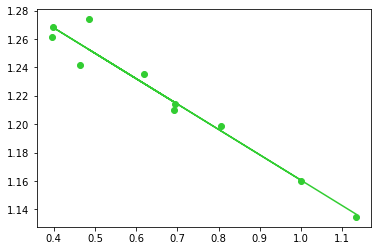

The Graph Will Now Display.



In [10]:
# Plot Graph of Conversion Factor VS Windspeed Ratio to Cheung Chau of Each Windspeed Station
pyplot.plot(Windspeed_Ratio_Ten_Stations, Conversion_Factor_Ten_Stations, 'o', label='Typhoon', c='limegreen')
Conversion_Factor_Slope, Conversion_Factor_Intercept = \
numpy.polyfit(Windspeed_Ratio_Ten_Stations, Conversion_Factor_Ten_Stations, 1)
pyplot.plot(Windspeed_Ratio_Ten_Stations, \
Conversion_Factor_Slope*Windspeed_Ratio_Ten_Stations + Conversion_Factor_Intercept, c='limegreen')
print (Conversion_Factor_Slope, Conversion_Factor_Intercept)
pyplot.show()
print ("The Graph Will Now Display.")
print ()

In [11]:
# Use Slope and y Intercept Obtained Above To Calculate Conversion Factor For Each Station
Conversion_Factor_All_Stations = numpy.empty(len(One_Hour_Windspeed_Stations))
for i in range(len(One_Hour_Windspeed_Stations)):
    Conversion_Factor_All_Stations[i] = \
    Conversion_Factor_Slope * Windspeed_Ratio_Stations[i] + Conversion_Factor_Intercept
print (Conversion_Factor_All_Stations)

[1.21187957 1.21599519 1.16054396 1.16822614 1.16348996 1.1953399
 1.22866647 1.25633812 1.20797969 1.21514628 1.07698982 1.22220472
 1.1955894  1.2826904  1.21564997 1.18748469 1.23264115 1.26823706
 1.26026361 1.22061336 1.26869437 1.18575615 1.1004319  1.22803485
 1.17536317 1.13946433 1.27917767 1.2526415  1.2610784  1.13663804
 1.26952391 1.25254396]


In [12]:
# Calculate Ten Minute Windspeed of All Typhoons and All Windspeed Stations Using Conversion Factor
Ten_Min_Windspeed_Final = numpy.zeros((len(One_Hour_Windspeed_Stations), len(One_Hour_Windspeed_File)))
for j in range(len(One_Hour_Windspeed_Stations)):
    for i in range(len(Ten_Min_Windspeed_Stations)):
        if Ten_Min_Windspeed_Stations[i] == One_Hour_Windspeed_Stations[j]:
            for l in range(len(One_Hour_Windspeed_File)):
                for k in range(len(Ten_Min_Windspeed_File)):
                    if Ten_Min_Typhoon_Code[k] == One_Hour_Typhoon_Code[l] and Ten_Min_Windspeed_Data[i][k] > 0:
                        Ten_Min_Windspeed_Final[j][l] = Ten_Min_Windspeed_Data[i][k]
                if Ten_Min_Windspeed_Final[j][l] == 0:
                    Ten_Min_Windspeed_Final[j][l] = \
                    round(One_Hour_Windspeed_Data[j][l] * Conversion_Factor_Ten_Stations[i], 0)
    if Ten_Min_Windspeed_Final[j][0] == 0:
        for l in range(len(One_Hour_Windspeed_File)):
            Ten_Min_Windspeed_Final[j][l] = round(One_Hour_Windspeed_Data[j][l] * Conversion_Factor_All_Stations[j], 0)
print (Ten_Min_Windspeed_Final)

[[ nan  38.  36. ...  nan  nan  nan]
 [ 40.  41.  41. ...  nan  nan  nan]
 [ 57.  63.  46. ...  99.  78.  29.]
 ...
 [ 60.  68.  58. ... 100.  66.  41.]
 [ 19.  17.  20. ...  nan  nan  nan]
 [ 29.  28.  28. ...  45.  39.  15.]]


In [13]:
# Create Output File For Windspeed Data
Windspeed_Output_File = open('Ten_Min_Windspeed_Data_Output.csv','w')
#
# Input Windspeed Stations Data Into Table
for i in range(len(One_Hour_Typhoon_Code)+1):
# Insert Heading With Typhoon Code, Typhoon Name and Windspeed Stations Name
    if i == 0:
        for j in range(len(One_Hour_Windspeed_Stations)+2):
            if j == 0:
                Windspeed_Output_File.write("%s" % "Typhoon Code")
                Windspeed_Output_File.write("%s" % ",")
            elif j == 1:
                Windspeed_Output_File.write("%s" % "Typhoon Name")
                Windspeed_Output_File.write("%s" % ",")
            else:
                Windspeed_Output_File.write("%s" % One_Hour_Windspeed_Stations[j-2])
                Windspeed_Output_File.write("%s" % ",")
# Insert Windspeed Stations Data For Each Station and Each Typhoon
    else:
        for j in range(len(One_Hour_Windspeed_Stations)+2):
            if j == 0:
                Windspeed_Output_File.write("%s" % One_Hour_Typhoon_Code[i-1])
                Windspeed_Output_File.write("%s" % ",")
            elif j == 1:
                Windspeed_Output_File.write("%s" % One_Hour_Typhoon_Name[i-1])
                Windspeed_Output_File.write("%s" % ",")
            else:
                Windspeed_Output_File.write("%s" % Ten_Min_Windspeed_Final[j-2][i-1])
                Windspeed_Output_File.write("%s" % ",")
    Windspeed_Output_File.write("%s\n" % " ")
#
# Close File
Windspeed_Output_File.close()
print ("Output is saved into file. File closed.")
print

Output is saved into file. File closed.


<function print>